## Clustering Assignment

Problem Statement - Identify top countries that are direst need of aid. Your job is to categorise the countries using some
socio-economic and health factors that determine the overall development of the country. Then you
need to suggest the countries which the CEO needs to focus on the most.


# 1. Read and visualise the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Supress Warnings

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# read the dataset
country_df = pd.read_csv("C:/Users/Asus/Documents/Data Science Course Material/Course -2 (ML)/Clustering Assignment/Final Assignment/Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
country_df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [7]:
# Data Insppection
# basics of the df
country_df.shape

(167, 10)

In [8]:
# Check the info
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
# Check the description
country_df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [10]:
# check for missing values
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
#Converte percentage columns to actual values.
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100

In [12]:
# again check the values
country_df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Perform EDA

check all variables:

In [22]:
# plot the correlation matrix - Bivariate Analysis
plt.figure(figsize = (20,10))        
sns.heatmap(country_df.corr(),annot = True)

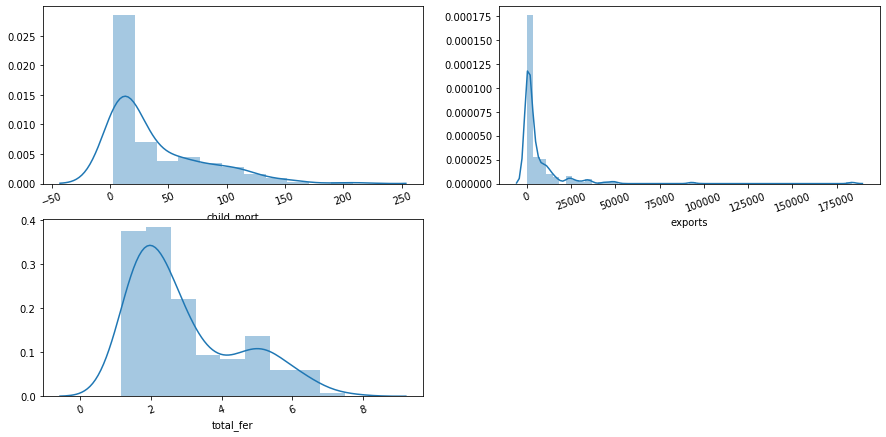

In [25]:
#checking the variance of variables - 'child_mort', 'exports', 'total_fer'
plt.figure(figsize=(15,15))
features = ['child_mort', 'exports', 'total_fer']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.distplot(country_df[i[1]])
    plt.xticks(rotation = 20)

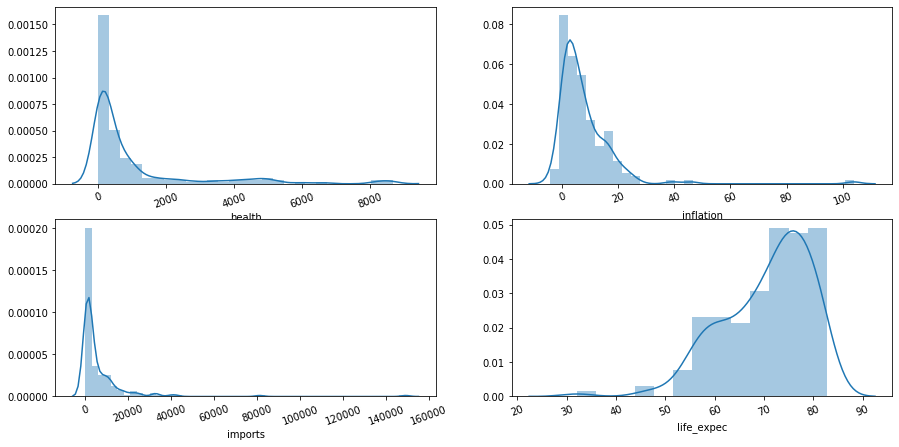

In [26]:
plt.figure(figsize=(15,15))
features = ['health', 'inflation', 'imports', 'life_expec']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.distplot(country_df[i[1]])
    plt.xticks(rotation = 20)

### Let's perfrom Outlier treatment

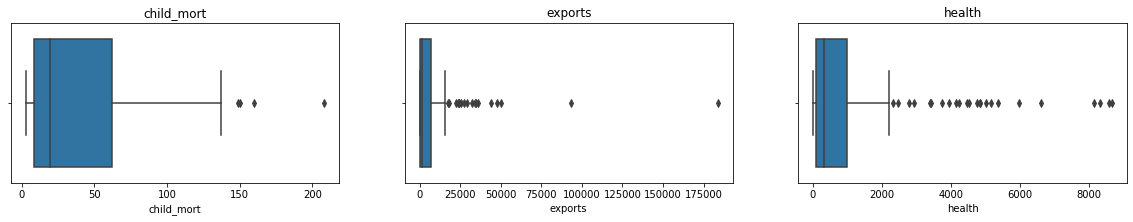

<Figure size 432x288 with 0 Axes>

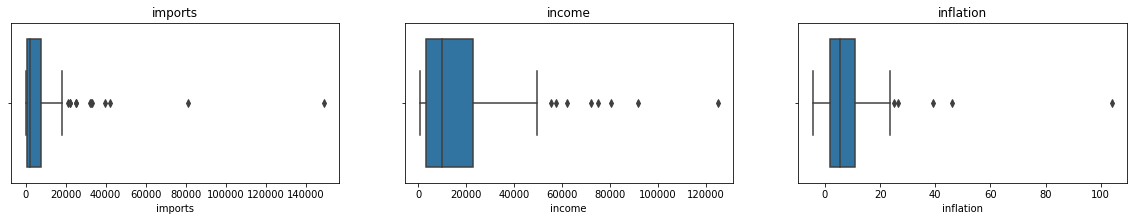

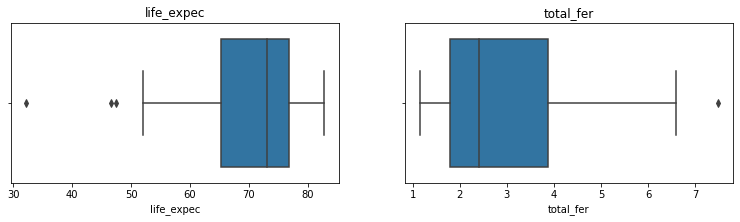

In [17]:
plt.figure(figsize=(20,10))

# Optional command, since matplotlib creates a figure by default anyway
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort")
sns.boxplot(country_df.child_mort)


# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports")
sns.boxplot(country_df.exports)


# subplot 3
plt.subplot(3, 3, 3)
plt.title("health")
sns.boxplot(country_df.health)

plt.figure(2)
plt.figure(figsize=(20,10))
# subplot 1
plt.subplot(3, 3, 1)
plt.title("imports")
sns.boxplot(country_df.imports)


# subplot 2 
plt.subplot(3, 3, 2)
plt.title("income")
sns.boxplot(country_df.income)


# subplot 3
plt.subplot(3, 3, 3)
plt.title("inflation")
sns.boxplot(country_df.inflation)

plt.figure(3)
plt.figure(figsize=(20,10))
# subplot 1
plt.subplot(3, 3, 1)
plt.title("life_expec")
sns.boxplot(country_df.life_expec)


# subplot 2 
plt.subplot(3, 3, 2)
plt.title("total_fer")
sns.boxplot(country_df.total_fer)


plt.show()

In [35]:
## 1. Outlier Treatment - Child Mortality Rate

Q1 = country_df['child_mort'].quantile(0.01)
Q4 = country_df['child_mort'].quantile(0.99)
country_df['child_mort'][country_df['child_mort'] <= Q1]=Q1
country_df['child_mort'][country_df['child_mort'] >= Q4]=Q4
country_df.shape

(167, 10)

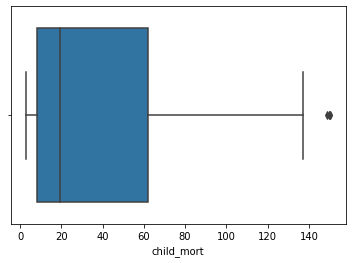

In [36]:
sns.boxplot(x='child_mort', data=country_df)

In [37]:
## 2. Outlier Treatment - exports Rate

Q1 = country_df['exports'].quantile(0.01)
Q4 = country_df['exports'].quantile(0.99)
country_df['exports'][country_df['exports'] <= Q1]=Q1
country_df['exports'][country_df['exports'] >= Q4]=Q4
country_df.shape

(167, 10)

In [38]:
sns.boxplot(x='exports', data=country_df)

In [39]:
## 3. Outlier Treatment - health Rate

Q1 = country_df['health'].quantile(0.01)
Q4 = country_df['health'].quantile(0.99)
country_df['health'][country_df['health'] <= Q1]=Q1
country_df['health'][country_df['health'] >= Q4]=Q4
country_df.shape

(167, 10)

In [40]:
sns.boxplot(x='health', data=country_df)

In [41]:
## 4. Outlier Treatment - imports Rate

Q1 = country_df['imports'].quantile(0.01)
Q4 = country_df['imports'].quantile(0.99)
country_df['imports'][country_df['imports'] <= Q1]=Q1
country_df['imports'][country_df['imports'] >= Q4]=Q4
country_df.shape
sns.boxplot(x='imports', data=country_df)

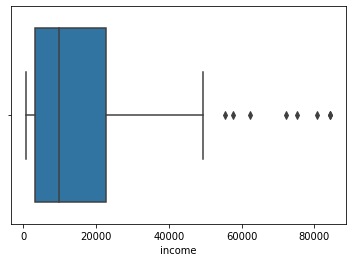

In [42]:
## 5. Outlier Treatment - income Rate

Q1 = country_df['income'].quantile(0.01)
Q4 = country_df['income'].quantile(0.99)
country_df['income'][country_df['income'] <= Q1]=Q1
country_df['income'][country_df['income'] >= Q4]=Q4
country_df.shape
sns.boxplot(x='income', data=country_df)

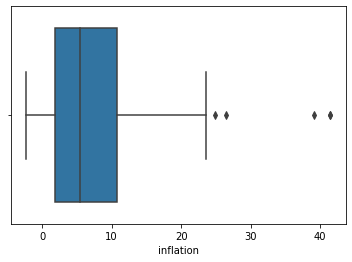

In [43]:
## 5. Outlier Treatment - inflation Rate

Q1 = country_df['inflation'].quantile(0.01)
Q4 = country_df['inflation'].quantile(0.99)
country_df['inflation'][country_df['inflation'] <= Q1]=Q1
country_df['inflation'][country_df['inflation'] >= Q4]=Q4
country_df.shape
sns.boxplot(x='inflation', data=country_df)

## Clustering 

### Hopkins Check

In [45]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [48]:
# drop the country column to make sure all columns are int values
country_df2=country_df.drop(['country'],axis=1)
country_df2.head()  

child_mort  exports    health   imports   income  inflation  life_expec  \
0        90.2    55.30   41.9174   248.297   1610.0       9.44        56.2   
1        16.6  1145.20  267.8950  1987.740   9930.0       4.49        76.3   
2        27.3  1712.64  185.9820  1400.440  12900.0      16.10        76.5   
3       119.0  2199.19  100.6050  1514.370   5900.0      22.40        60.1   
4        10.3  5551.00  735.6600  7185.800  19100.0       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [49]:
#Let's check the Hopkins measure
hopkins(country_df2)

0.8552794504200485

## Scaling the data

In [50]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_df2 = standard_scaler.fit_transform(country_df2)

In [52]:
country_df2 = pd.DataFrame(country_df2)
country_df2.columns = ["child_mort", "exports", "health", "imports", "income", "inflation", "life_expec", "total_fer", "gdpp"]
country_df2.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.348600 -0.569638 -0.566983 -0.598844 -0.851772   0.263649   -1.619092   
1   -0.548106 -0.473873 -0.440417 -0.413679 -0.387025  -0.375251    0.647866   
2   -0.272362 -0.424015 -0.486295 -0.476198 -0.221124   1.123260    0.670423   
3    2.090789 -0.381264 -0.534113 -0.464070 -0.612136   1.936405   -1.179234   
4   -0.710460 -0.086754 -0.178431  0.139659  0.125202  -0.768917    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

## K- means Clustering

### Look at the silhouette score plot and choose the optimal number of cluster

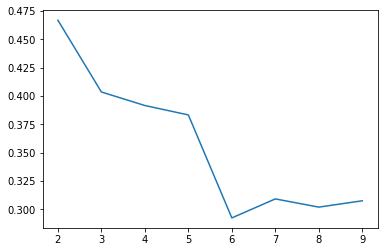

In [55]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(country_df2)
    ss.append([k, silhouette_score(country_df2, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

### Look at the Elbow Curve plot and choose the optimal number of cluster

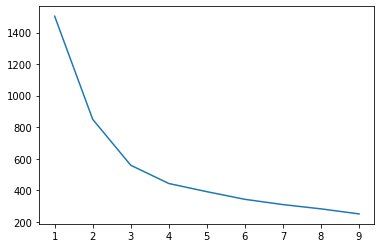

In [56]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(country_df2)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

## KMeans with the K  we have chosen

In [57]:
#Let's perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(country_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [58]:
# Check the labels
kmean.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [59]:
# assign the label
country_df2['cluster_id'] = kmean.labels_
country_df2.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.348600 -0.569638 -0.566983 -0.598844 -0.851772   0.263649   -1.619092   
1   -0.548106 -0.473873 -0.440417 -0.413679 -0.387025  -0.375251    0.647866   
2   -0.272362 -0.424015 -0.486295 -0.476198 -0.221124   1.123260    0.670423   
3    2.090789 -0.381264 -0.534113 -0.464070 -0.612136   1.936405   -1.179234   
4   -0.710460 -0.086754 -0.178431  0.139659  0.125202  -0.768917    0.704258   

   total_fer      gdpp  cluster_id  
0   1.902882 -0.679180           1  
1  -0.859973 -0.485623           2  
2  -0.038404 -0.465376           2  
3   2.128151 -0.516268           1  
4  -0.541946 -0.041817           2

In [60]:
df = country_df.copy()
df.head()


country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [67]:
# Add coulum "cluster_id"
country_df['cluster_id'] = kmean.labels_
country_df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  cluster_id  
0       9.44        56.2       5.82    553           1  
1       4.49        76.3       1.65   4090           2  
2      16.10        76.5       2.89   4460           2  
3      22.40        60.1       6.16   3530           1  
4       1.44        76.8       2.13  12200           2

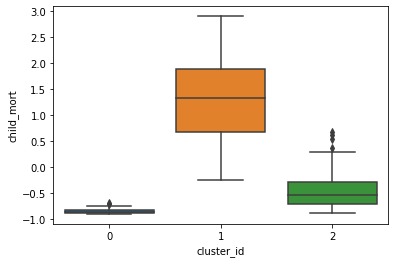

In [62]:
# plot -- Child_mort
sns.boxplot(x='cluster_id', y='child_mort', data=country_df2)

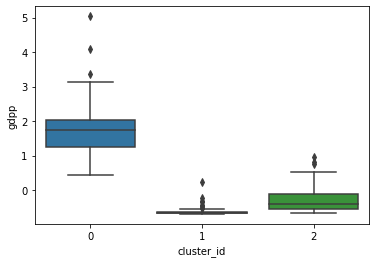

In [63]:
# plot - GDPP
sns.boxplot(x='cluster_id', y='gdpp', data=country_df2)

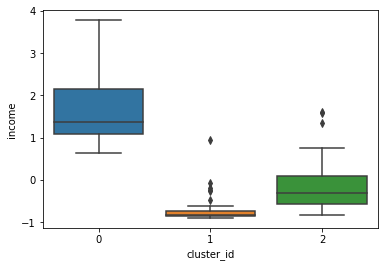

In [64]:
# plot - Income
sns.boxplot(x='cluster_id', y='income', data=country_df2)

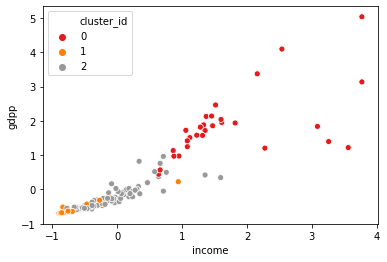

In [65]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country_df2, palette='Set1')

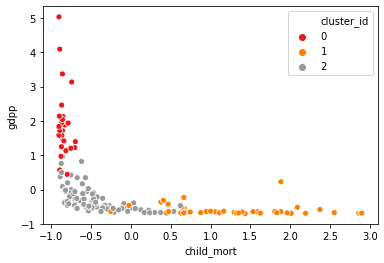

In [66]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = country_df2, palette='Set1')

## Cluster Profiling in Kmeans

In [68]:
country_df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  cluster_id  
0       9.44        56.2       5.82    553           1  
1       4.49        76.3       1.65   4090           2  
2      16.10        76.5       2.89   4460           2  
3      22.40        60.1       6.16   3530           1  
4       1.44        76.8       2.13  12200           2

In [70]:
# Taking 3 variables to perform CLuster Profiling
cp_df = country_df[['cluster_id','gdpp', 'income', 'child_mort']]
cp_df.head()

cluster_id   gdpp   income  child_mort
0           1    553   1610.0        90.2
1           2   4090   9930.0        16.6
2           2   4460  12900.0        27.3
3           1   3530   5900.0       119.0
4           2  12200  19100.0        10.3

In [71]:
cp_df.groupby('cluster_id').mean()

gdpp        income  child_mort
cluster_id                                        
0           47262.068966  47784.413793    4.989655
1            1909.208333   3901.010000   90.210127
2            7808.577778  13804.333333   20.547778

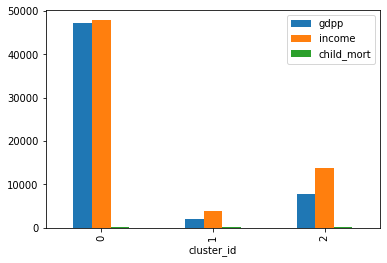

In [72]:
cp_df.groupby('cluster_id').mean().plot(kind = 'bar')

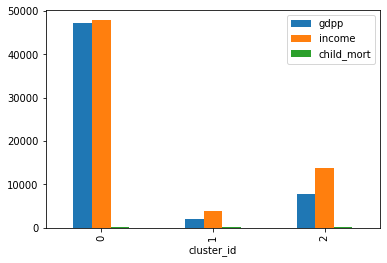

In [75]:
country_df[['cluster_id','gdpp', 'income', 'child_mort']].groupby('cluster_id').mean().plot(kind = 'bar')

## Finding the observations that belong to certain cluster

In [104]:
#Let's use the concept of binning
# choose the cluster-1 which has Low income and gdpp and high Child_mort
country_df[country_df['cluster_id']==1]['country']

0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [77]:
# Check the count of observation per cluster
country_df['cluster_id'].value_counts()

2    90
1    48
0    29
Name: cluster_id, dtype: int64

In [105]:
# choose the cluster-1 which has Low income and gdpp and high Child_mort
country_df[country_df['cluster_id']==1].sort_values(by=["gdpp", 'income', 'child_mort'], ascending=[True, True, False]) 

country  child_mort       exports      health  \
26                    Burundi    93.60000     22.243716   26.796000   
88                    Liberia    89.30000     62.457000   38.586000   
37           Congo, Dem. Rep.   116.00000    137.274000   26.419400   
112                     Niger   123.00000     77.256000   17.956800   
132              Sierra Leone   150.39304     67.032000   52.269000   
93                 Madagascar    62.20000    103.250000   17.009362   
106                Mozambique   101.00000    131.985000   21.829900   
31   Central African Republic   149.00000     52.628000   17.750800   
94                     Malawi    90.50000    104.652000   30.248100   
50                    Eritrea    55.20000     23.087800   17.009362   
150                      Togo    90.30000    196.176000   37.332000   
64              Guinea-Bissau   114.00000     81.503000   46.495000   
0                 Afghanistan    90.20000     55.300000   41.917400   
56                     Gambia    80.30000    133.756000   31.977800   
126                    Rwanda    63.60000     67.560000   59.115000   
25               Burkina Faso   116.00000    110.400000   38.755000   
155                    Uganda    81.00000    101.745000   53.609500   
63                     Guinea   109.00000    196.344000   31.946400   
66                      Haiti   150.39304    101.286000   45.744200   
147                  Tanzania    71.90000    131.274000   42.190200   
97                       Mali   137.00000    161.424000   35.258400   
17                      Benin   111.00000    180.404000   31.078000   
36                    Comoros    88.20000    126.885000   34.681900   
32                       Chad   150.00000    330.096000   40.634100   
80                      Kenya    62.20000    200.169000   45.932500   
129                   Senegal    66.80000    249.000000   56.600000   
116                  Pakistan    92.10000    140.400000   22.880000   
84                        Lao    78.90000    403.560000   50.958000   
87                    Lesotho    99.70000    460.980000  129.870000   
99                 Mauritania    97.40000    608.400000   52.920000   
40              Cote d'Ivoire   111.00000    617.320000   64.660000   
136           Solomon Islands    28.10000    635.970000  110.295000   
28                   Cameroon   108.00000    290.820000   67.203000   
59                      Ghana    74.70000    386.450000   68.382000   
165                     Yemen    56.30000    393.000000   67.858000   
166                    Zambia    83.10000    540.200000   85.994000   
142                     Sudan    76.70000    291.560000   93.536000   
81                   Kiribati    62.70000    198.170000  168.370000   
113                   Nigeria   130.00000    589.490000  118.131000   
38                Congo, Rep.    63.90000   2331.740000   67.404000   
3                      Angola   119.00000   2199.190000  100.605000   
149               Timor-Leste    62.60000     79.200000  328.320000   
72                       Iraq    36.90000   1773.000000  378.450000   
108                   Namibia    56.00000   2480.820000  351.882000   
21                   Botswana    52.50000   2768.600000  527.050000   
137              South Africa    53.70000   2082.080000  650.832000   
55                      Gabon    63.70000   5048.750000  306.250000   
49          Equatorial Guinea   111.00000  14671.800000  766.080000   

         imports    income  inflation  life_expec  total_fer   gdpp  \
26     104.90964    764.00     12.300        57.7       6.26    231   
88     302.80200    742.24      5.470        60.8       5.02    327   
37     165.66400    742.24     20.800        57.5       6.54    334   
112    170.86800    814.00      2.550        58.8       7.49    348   
132    137.65500   1220.00     17.200        55.0       5.20    399   
93     177.59000   1390.00      8.790        60.8       4.60    413   
106    193.57800    918.00      7.640        

#### Top 5 countries which needs immediate AID using K-Means Clustering are:

In [106]:
top5_df_km = country_df[country_df['cluster_id']==1].sort_values(by=["gdpp", 'income', 'child_mort'], ascending=[True, True, False])
top5_df_km[['country']].head()

country
26            Burundi
88            Liberia
37   Congo, Dem. Rep.
112             Niger
132      Sierra Leone

## Hierarchical Clustering

In [83]:
# Take the scaled dataset - country_df2
country_df2.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.348600 -0.569638 -0.566983 -0.598844 -0.851772   0.263649   -1.619092   
1   -0.548106 -0.473873 -0.440417 -0.413679 -0.387025  -0.375251    0.647866   
2   -0.272362 -0.424015 -0.486295 -0.476198 -0.221124   1.123260    0.670423   
3    2.090789 -0.381264 -0.534113 -0.464070 -0.612136   1.936405   -1.179234   
4   -0.710460 -0.086754 -0.178431  0.139659  0.125202  -0.768917    0.704258   

   total_fer      gdpp  cluster_id  
0   1.902882 -0.679180           1  
1  -0.859973 -0.485623           2  
2  -0.038404 -0.465376           2  
3   2.128151 -0.516268           1  
4  -0.541946 -0.041817           2

In [85]:
scaled_df = country_df2.drop(['cluster_id'],axis=1)
scaled_df

child_mort   exports    health   imports    income  inflation  \
0      1.348600 -0.569638 -0.566983 -0.598844 -0.851772   0.263649   
1     -0.548106 -0.473873 -0.440417 -0.413679 -0.387025  -0.375251   
2     -0.272362 -0.424015 -0.486295 -0.476198 -0.221124   1.123260   
3      2.090789 -0.381264 -0.534113 -0.464070 -0.612136   1.936405   
4     -0.710460 -0.086754 -0.178431  0.139659  0.125202  -0.768917   
..          ...       ...       ...       ...       ...        ...   
162   -0.223398 -0.452889 -0.503129 -0.458660 -0.776921  -0.616614   
163   -0.535221 -0.236434 -0.219210 -0.372349 -0.020031   4.398816   
164   -0.375444 -0.491622 -0.540275 -0.513436 -0.690898   0.606977   
165    0.474981 -0.539966 -0.552454 -0.577305 -0.691456   2.091290   
166    1.165630 -0.527032 -0.542296 -0.577252 -0.758487   0.852211   

     life_expec  total_fer      gdpp  
0     -1.619092   1.902882 -0.679180  
1      0.647866  -0.859973 -0.485623  
2      0.670423  -0.038404 -0.465376  
3     -1.179234   2.128151 -0.516268  
4      0.704258  -0.541946 -0.041817  
..          ...        ...       ...  
162   -0.852161   0.365754 -0.546913  
163    0.546361  -0.316678  0.029323  
164    0.286958  -0.661206 -0.637754  
165   -0.344633   1.140944 -0.637754  
166   -2.092785   1.624609 -0.629546  

[167 rows x 9 columns]

#### Single Linkage

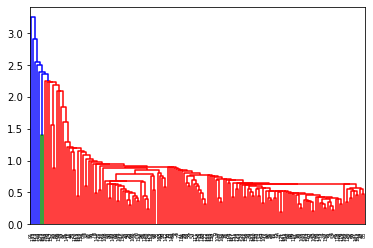

In [86]:
# single linkage
mergings = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Complete Linkage

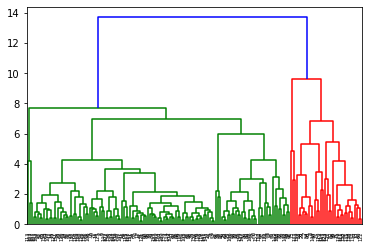

In [88]:
# complete linkage
mergings = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Take 3 clusters

In [89]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [90]:
# assign cluster labels
country_df2['cluster_labels'] = cluster_labels
country_df2.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.348600 -0.569638 -0.566983 -0.598844 -0.851772   0.263649   -1.619092   
1   -0.548106 -0.473873 -0.440417 -0.413679 -0.387025  -0.375251    0.647866   
2   -0.272362 -0.424015 -0.486295 -0.476198 -0.221124   1.123260    0.670423   
3    2.090789 -0.381264 -0.534113 -0.464070 -0.612136   1.936405   -1.179234   
4   -0.710460 -0.086754 -0.178431  0.139659  0.125202  -0.768917    0.704258   

   total_fer      gdpp  cluster_id  cluster_labels  
0   1.902882 -0.679180           1               0  
1  -0.859973 -0.485623           2               0  
2  -0.038404 -0.465376           2               0  
3   2.128151 -0.516268           1               0  
4  -0.541946 -0.041817           2               0

In [94]:
# assign cluster labels
country_df['cluster_labels'] = cluster_labels
country_df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  cluster_id  cluster_labels  
0       9.44        56.2       5.82    553           1               0  
1       4.49        76.3       1.65   4090           2               0  
2      16.10        76.5       2.89   4460           2               0  
3      22.40        60.1       6.16   3530           1               0  
4       1.44        76.8       2.13  12200           2               0

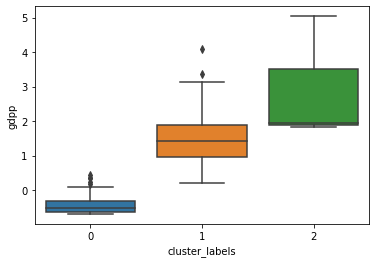

In [91]:
# plots -- GDPP
sns.boxplot(x='cluster_labels', y='gdpp', data=country_df2)

In [92]:
# plots -- income
sns.boxplot(x='cluster_labels', y='income', data=country_df2)

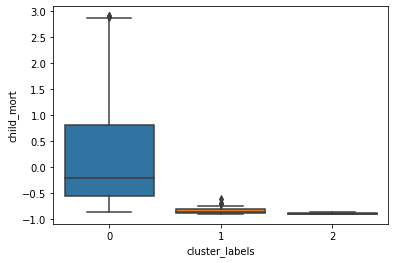

In [93]:
# plots -- child_mort
sns.boxplot(x='cluster_labels', y='child_mort', data=country_df2)

## Cluster Profiling in Hierarchical

In [95]:
country_df.head()

country  child_mort  exports    health   imports   income  \
0          Afghanistan        90.2    55.30   41.9174   248.297   1610.0   
1              Albania        16.6  1145.20  267.8950  1987.740   9930.0   
2              Algeria        27.3  1712.64  185.9820  1400.440  12900.0   
3               Angola       119.0  2199.19  100.6050  1514.370   5900.0   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800  19100.0   

   inflation  life_expec  total_fer   gdpp  cluster_id  cluster_labels  
0       9.44        56.2       5.82    553           1               0  
1       4.49        76.3       1.65   4090           2               0  
2      16.10        76.5       2.89   4460           2               0  
3      22.40        60.1       6.16   3530           1               0  
4       1.44        76.8       2.13  12200           2               0

In [102]:
country_df[['cluster_labels','gdpp', 'income', 'child_mort']].groupby('cluster_labels').mean()

gdpp        income  child_mort
cluster_labels                                        
0                4793.236641   9445.331908   46.860199
1               40509.090909  41693.151515    5.321212
2               66766.666667  67391.333333    3.266667

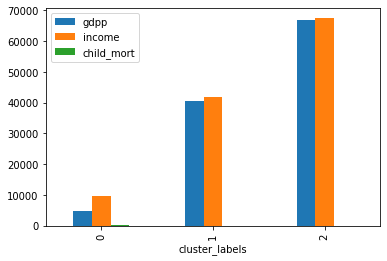

In [103]:
#check the mean values for GDPP, Income and Child Mortality
country_df[['cluster_labels','gdpp', 'income', 'child_mort']].groupby('cluster_labels').mean().plot(kind = 'bar')

## Finding the observations that belong to certain cluster

In [108]:
#Let's use the concept of binning
# choose the cluster-0 which has Low income and gdpp and high Child_mort
country_df[country_df['cluster_labels']==0]['country']

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 131, dtype: object

In [100]:
# Check the count of observation per cluster
country_df['cluster_labels'].value_counts()

0    131
1     33
2      3
Name: cluster_labels, dtype: int64

In [109]:
# choose the cluster-0 which has Low income and gdpp and high Child_mort
country_df[country_df['cluster_labels']==0].sort_values(by=["gdpp", 'income', 'child_mort'], ascending=[True, True, False]) 

country  child_mort       exports     health      imports  \
26             Burundi    93.60000     22.243716    26.7960    104.90964   
88             Liberia    89.30000     62.457000    38.5860    302.80200   
37    Congo, Dem. Rep.   116.00000    137.274000    26.4194    165.66400   
112              Niger   123.00000     77.256000    17.9568    170.86800   
132       Sierra Leone   150.39304     67.032000    52.2690    137.65500   
..                 ...         ...           ...        ...          ...   
13            Barbados    14.20000   6320.000000  1275.2000   7792.00000   
49   Equatorial Guinea   111.00000  14671.800000   766.0800  10071.90000   
115               Oman    11.70000  12680.100000   534.6100   7951.60000   
128       Saudi Arabia    15.70000   9572.800000   827.9700   6369.00000   
11             Bahrain     8.60000  14386.500000  1028.7900  10536.30000   

       income  inflation  life_expec  total_fer   gdpp  cluster_id  \
26     764.00     12.300        57.7       6.26    231           1   
88     742.24      5.470        60.8       5.02    327           1   
37     742.24     20.800        57.5       6.54    334           1   
112    814.00      2.550        58.8       7.49    348           1   
132   1220.00     17.200        55.0       5.20    399           1   
..        ...        ...         ...        ...    ...         ...   
13   15300.00      0.321        76.7       1.78  16000           2   
49   33700.00     24.900        60.9       5.21  17100           1   
115  45300.00     15.600        76.1       2.90  19300           2   
128  45400.00     17.200        75.1       2.96  19300           2   
11   41100.00      7.440        76.0       2.16  20700           2   

     cluster_labels  
26                0  
88                0  
37                0  
112               0  
132               0  
..              ...  
13                0  
49                0  
115               0  
128               0  
11                0  

[131 rows x 12 columns]

#### Top 5 countries which needs immediate AID using Hierarchical Clustering are:

In [110]:
top5_df_hc = country_df[country_df['cluster_labels']==0].sort_values(by=["gdpp", 'income', 'child_mort'], ascending=[True, True, False])
top5_df_hc[['country']].head()

country
26            Burundi
88            Liberia
37   Congo, Dem. Rep.
112             Niger
132      Sierra Leone